# Data 1
https://huggingface.co/datasets/Amod/mental_health_counseling_conversations

## Imports

In [1]:
import pandas as pd
import re
from google.colab import files

# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Visualizations
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt

## Explore data

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1uMXnIYkTLw1A9ExUCrhkXQCUO0whTmAs' # id from you google drive file

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('train.csv')
df  = pd.read_csv("train.csv")
df.head()

ApiRequestError: <HttpError 404 when requesting https://www.googleapis.com/drive/v2/files/1uMXnIYkTLw1A9ExUCrhkXQCUO0whTmAs?alt=json returned "File not found: 1uMXnIYkTLw1A9ExUCrhkXQCUO0whTmAs". Details: "[{'message': 'File not found: 1uMXnIYkTLw1A9ExUCrhkXQCUO0whTmAs', 'domain': 'global', 'reason': 'notFound', 'location': 'file', 'locationType': 'other'}]">

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

## Clean data

In [ ]:
#@title Drop null rows
null_rows = df.isnull().any(axis=1) # Identify rows with null values
df_cleaned = df[~null_rows] # Drop rows with null values

df_cleaned.shape # Display new shape

In [ ]:
#@title Remove the duplicate rows
df.drop_duplicates()
df.shape

In [ ]:
df["Context"][0]

In [ ]:
df["Response"][0]

In [ ]:
#@title Normalize Text
# & Remove Unicode Characters

def clean_text(text):
  text = str(text).lower() # Convert text to lowercase
  text = re.sub("[\[].*?[\]]", "", text) # Remove text within square brackets
  text = re.sub(r"http\S+", "", text) # Remove URLs
  text = re.sub(r"[^\w\s]", "", text) # Remove non-alphanumeric characters (excluding spaces)
  text = re.sub(r"\d+", "", text) # Remove digits
  return text

# Apply the clean_text function
df['Context'].apply(clean_text)
df['Response'].apply(clean_text)
df.head()

In [ ]:
#@title Remove escape sequences

df['Context'] = df['Context'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df['Response'] = df['Response'].astype(str).apply(lambda x: re.sub(r'\s+', ' ', x).strip())

df.head()

In [ ]:
df["Context"][0]

In [ ]:
df["Response"][0]

## Add token

In [ ]:
df['Context'] = df['Context'].apply(lambda x: "<user> " + str(x))
df['Response'] = df['Response'].apply(lambda x: "<agent> " + str(x))

df.head()

## Visualizations

In [ ]:
#@title Cloud image

# Join the array of strings into a single string
Context = " ".join(df["Context"])
Response = " ".join(df["Response"])

# Generate and display a word cloud image (Context)
wordcloud = WordCloud(background_color='white').generate(Context)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Context")
plt.show()

# Generate and display a word cloud image (Response)
wordcloud = WordCloud(background_color='white').generate(Response)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Response")
print(" ")
plt.show()

In [ ]:
#@title Most common words

# Split the 'Context' documents into words and flatten the list
context_words = [word for document in df["Context"] for word in str(document).split()]

# Count the occurrences of each word in 'Context'
context_word_counts = Counter(context_words)

# Get the most common words and their counts in 'Context'
most_common_context_words = context_word_counts.most_common(10)

# Unzip the words and their counts in 'Context'
context_words, context_counts = zip(*most_common_context_words)

# Create and display a bar chart for 'Context'
plt.bar(context_words, context_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Context")
plt.show()

# Split the 'Response' documents into words and flatten the list
response_words = [word for document in df["Response"] for word in str(document).split()]

# Count the occurrences of each word in 'Response'
response_word_counts = Counter(response_words)

# Get the most common words and their counts in 'Response'
most_common_response_words = response_word_counts.most_common(10)

# Unzip the words and their counts in 'Response'
response_words, response_counts = zip(*most_common_response_words)

# Create and display a bar chart for 'Response'
plt.bar(response_words, response_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Response")
print(" ")
plt.show()

# Data 2
https://www.kaggle.com/datasets/thedevastator/mental-health-chatbot-pairs

## Explore data

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1dDdJjepjJ8TEXkJZdjDVMGL0bKM7TlII' # id from you google drive file

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile('train2.csv')
df2  = pd.read_csv("train2.csv")
df2.head()

In [ ]:
df2.shape

In [ ]:
df2.info()

In [ ]:
df2.isnull().sum()

## Clean data

In [ ]:
#@title Remove the duplicate rows
df2.drop_duplicates()
df2.shape

In [ ]:
df2["text"][0]

In [ ]:
#@title Normalize Text
# & Remove Unicode Characters

def clean_text(text):
  text = str(text).lower() # Convert text to lowercase
  text = re.sub("[\[].*?[\]]", "", text) # Remove text within square brackets
  text = re.sub(r"http\S+", "", text) # Remove URLs
  text = re.sub(r"[^\w\s]", "", text) # Remove non-alphanumeric characters (excluding spaces)
  text = re.sub(r"\d+", "", text) # Remove digits
  return text

# Apply the clean_text function
df2['text'].apply(clean_text)
df2.head()

## Change token

In [ ]:
#@title Replace function

# function that replace occurrences of <HUMAN> with <user> and <ASSISTANT> with <agent>
def replace_entities(text):
    # Replace <HUMAN> with <user>
    text = text.replace('<HUMAN>', '<user>')
    # Replace <ASSISTANT> with <agent>
    text = text.replace('<ASSISTANT>', '<agent>')
    # Replace : with space
    text = text.replace(':', '')
    return text

# Apply the function to each cell in the 'Context' column
df2['text'] = df2['text'].apply(replace_entities)

df2.head()

In [ ]:
#@title Split to 2 columns

# Split each row into two columns based on the occurrence of the word "\n"
df2[['Context', 'Response']] = df2['text'].str.split('\n', 1, expand=True)

# Remove any leading or trailing whitespace from the 'Response' column
df2['Response'] = df2['Response'].str.strip()

df2.head()

In [ ]:
#@title Remove escape sequences

df2['Context'] = df2['Context'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df2['Response'] = df2['Response'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

df2.head()

In [ ]:
#@title Drop text column
df2.drop('text', axis=1, inplace=True)
df2.head()

In [ ]:
df2['Context'][0]

In [ ]:
df2['Response'][0]

---------------

## Visualizations

In [ ]:
#@title Cloud image

# Join the array of strings into a single string
Context = " ".join(df2["Context"])
Response = " ".join(df2["Response"])

# Generate and display a word cloud image (Context)
wordcloud = WordCloud(background_color='white').generate(Context)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Context")
plt.show()

# Generate and display a word cloud image (Response)
wordcloud = WordCloud(background_color='white').generate(Response)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Response")
print(" ")
plt.show()

In [ ]:
#@title Most common words

# Split the 'Context' documents into words and flatten the list
context_words = [word for document in df2["Context"] for word in str(document).split()]

# Count the occurrences of each word in 'Context'
context_word_counts = Counter(context_words)

# Get the most common words and their counts in 'Context'
most_common_context_words = context_word_counts.most_common(10)

# Unzip the words and their counts in 'Context'
context_words, context_counts = zip(*most_common_context_words)

# Create and display a bar chart for 'Context'
plt.bar(context_words, context_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Context")
plt.show()

# Split the 'Response' documents into words and flatten the list
response_words = [word for document in df2["Response"] for word in str(document).split()]

# Count the occurrences of each word in 'Response'
response_word_counts = Counter(response_words)

# Get the most common words and their counts in 'Response'
most_common_response_words = response_word_counts.most_common(10)

# Unzip the words and their counts in 'Response'
response_words, response_counts = zip(*most_common_response_words)

# Create and display a bar chart for 'Response'
plt.bar(response_words, response_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Response")
print(" ")
plt.show()

# Data 3
https://huggingface.co/datasets/mpingale/mental-health-chat-dataset?p=2

## Explore data

In [5]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00


In [6]:
#@title Load data for Hugging face
from datasets import load_dataset

dataset = load_dataset("mpingale/mental-health-chat-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/2775 [00:00<?, ? examples/s]

In [7]:
#@title Convert to Pandas df

train_dataset = dataset["train"]
df3 = train_dataset.to_pandas()

df3.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,text
0,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Jennifer MolinariHypnotherapist & Licensed Cou...,https://counselchat.com/therapists/jennifer-mo...,It is very common for people to have multiple ...,3,1971,<s>[INST] I have so many issues to address. I ...
1,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Jason Lynch, MS, LMHC, LCAC, ADSIndividual & C...",https://counselchat.com/therapists/jason-lynch...,"I've never heard of someone having ""too many i...",2,386,<s>[INST] I have so many issues to address. I ...
2,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,Shakeeta TorresFaith Based Mental Health Couns...,https://counselchat.com/therapists/shakeeta-to...,Absolutely not. I strongly recommending worki...,2,3071,<s>[INST] I have so many issues to address. I ...
3,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Noorayne ChevalierMA, RP, CCC, CCAC, LLP (Mich...",https://counselchat.com/therapists/noorayne-ch...,Let me start by saying there are never too man...,2,2643,<s>[INST] I have so many issues to address. I ...
4,0,Do I have too many issues for counseling?,I have so many issues to address. I have a his...,https://counselchat.com/questions/do-i-have-to...,depression,"Toni Teixeira, LCSWYour road to healing begins...",https://counselchat.com/therapists/toni-teixei...,I just want to acknowledge you for the courage...,1,256,<s>[INST] I have so many issues to address. I ...


In [8]:
#@title Drop columns

# Select only the 'questionText' and 'answerText' columns
df3 = df3[['questionText', 'answerText']]
df3.head()

,questionText,answerText
0,I have so many issues to address. I have a his...,It is very common for people to have multiple ...
1,I have so many issues to address. I have a his...,"I've never heard of someone having ""too many i..."
2,I have so many issues to address. I have a his...,Absolutely not. I strongly recommending worki...
3,I have so many issues to address. I have a his...,Let me start by saying there are never too man...
4,I have so many issues to address. I have a his...,I just want to acknowledge you for the courage...


In [9]:
df3.shape

(2775, 2)

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questionText  2636 non-null   object
 1   answerText    2749 non-null   object
dtypes: object(2)
memory usage: 43.5+ KB


In [11]:
df3.isnull().sum()

questionText    139
answerText       26
dtype: int64

## Clean data

In [12]:
#@title Drop null rows
null_rows = df3.isnull().any(axis=1) # Identify rows with null values
df3 = df3[~null_rows] # Drop rows with null values

df3.shape # Display new shape

(2612, 2)

In [13]:
#@title Remove the duplicate rows
df3.drop_duplicates()
df3.shape

(2612, 2)

In [14]:
#@title Normalize Text
# & Remove Unicode Characters

def clean_text(text):
  text = str(text).lower() # Convert text to lowercase
  text = re.sub("[\[].*?[\]]", "", text) # Remove text within square brackets
  text = re.sub(r"http\S+", "", text) # Remove URLs
  text = re.sub(r"[^\w\s]", "", text) # Remove non-alphanumeric characters (excluding spaces)
  text = re.sub(r"\d+", "", text) # Remove digits
  return text

# Apply the clean_text function
df3['questionText'].apply(clean_text)
df3['answerText'].apply(clean_text)
df3.head()

,questionText,answerText
0,I have so many issues to address. I have a his...,It is very common for people to have multiple ...
1,I have so many issues to address. I have a his...,"I've never heard of someone having ""too many i..."
2,I have so many issues to address. I have a his...,Absolutely not. I strongly recommending worki...
3,I have so many issues to address. I have a his...,Let me start by saying there are never too man...
4,I have so many issues to address. I have a his...,I just want to acknowledge you for the courage...


## Add token

In [15]:
df3['questionText'] = df3['questionText'].apply(lambda x: "<user> " + str(x))
df3['answerText'] = df3['answerText'].apply(lambda x: "<agent> " + str(x))

df3.head()

,questionText,answerText
0,<user> I have so many issues to address. I hav...,<agent> It is very common for people to have m...
1,<user> I have so many issues to address. I hav...,"<agent> I've never heard of someone having ""to..."
2,<user> I have so many issues to address. I hav...,<agent> Absolutely not. I strongly recommendi...
3,<user> I have so many issues to address. I hav...,<agent> Let me start by saying there are never...
4,<user> I have so many issues to address. I hav...,<agent> I just want to acknowledge you for the...


In [16]:
#@title Remove escape sequences

df3['questionText'] = df3['questionText'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df3['answerText'] = df3['answerText'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

df3.head()

,questionText,answerText
0,<user> I have so many issues to address. I hav...,<agent> It is very common for people to have m...
1,<user> I have so many issues to address. I hav...,"<agent> I've never heard of someone having ""to..."
2,<user> I have so many issues to address. I hav...,<agent> Absolutely not. I strongly recommendin...
3,<user> I have so many issues to address. I hav...,<agent> Let me start by saying there are never...
4,<user> I have so many issues to address. I hav...,<agent> I just want to acknowledge you for the...


In [17]:
#@title Rename Column

df3.rename(columns={'questionText': 'Context', 'answerText': 'Response'}, inplace=True)
df3.head()

,Context,Response
0,<user> I have so many issues to address. I hav...,<agent> It is very common for people to have m...
1,<user> I have so many issues to address. I hav...,"<agent> I've never heard of someone having ""to..."
2,<user> I have so many issues to address. I hav...,<agent> Absolutely not. I strongly recommendin...
3,<user> I have so many issues to address. I hav...,<agent> Let me start by saying there are never...
4,<user> I have so many issues to address. I hav...,<agent> I just want to acknowledge you for the...


In [18]:
df3['Context'][0]

'<user> I have so many issues to address. I have a history of sexual abuse, I’m a breast cancer survivor and I am a lifetime insomniac. I have a long history of depression and I’m beginning to have anxiety. I have low self esteem but I’ve been happily married for almost 35 years. I’ve never had counseling about any of this. Do I have too many issues to address in counseling?'

In [19]:
df3['Response'][0]

'<agent> It is very common for people to have multiple issues that they want to (and need to) address in counseling. I have had clients ask that same question and through more exploration, there is often an underlying fear that they "can\'t be helped" or that they will "be too much for their therapist." I don\'t know if any of this rings true for you. But, most people have more than one problem in their lives and more often than not, people have numerous significant stressors in their lives. Let\'s face it, life can be complicated! Therapists are completely ready and equipped to handle all of the issues small or large that a client presents in session. Most therapists over the first couple of sessions will help you prioritize the issues you are facing so that you start addressing the issues that are causing you the most distress. You can never have too many issues to address in counseling. All of the issues you mention above can be successfully worked through in counseling.'

## Visualizations

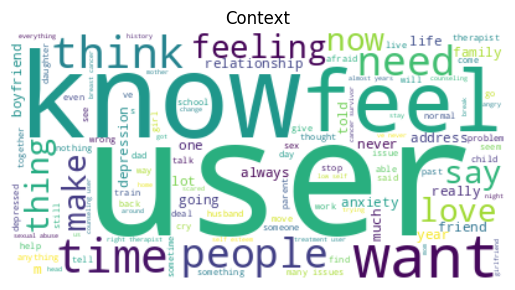

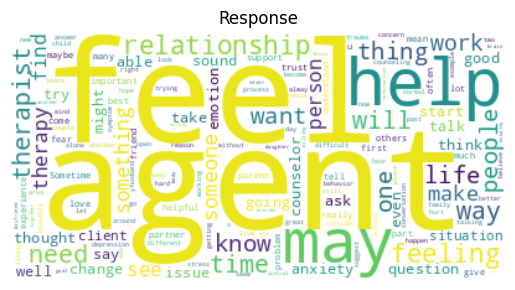

In [20]:
#@title Cloud image

# Join the array of strings into a single string
Context = " ".join(df3["Context"])
Response = " ".join(df3["Response"])

# Generate and display a word cloud image (Context)
wordcloud = WordCloud(background_color='white').generate(Context)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Context")
plt.show()

# Generate and display a word cloud image (Response)
wordcloud = WordCloud(background_color='white').generate(Response)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Response")
print(" ")
plt.show()

----------------------

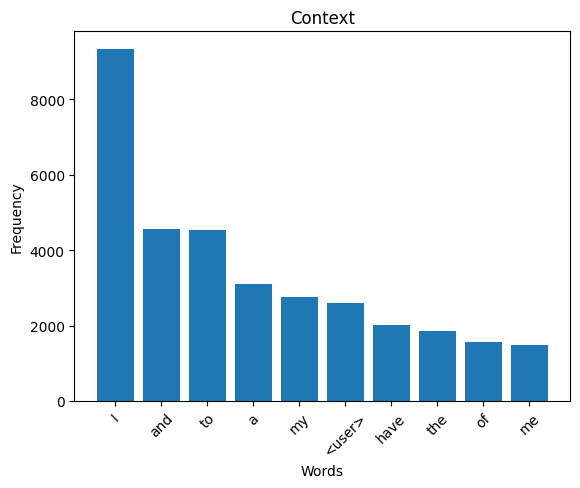

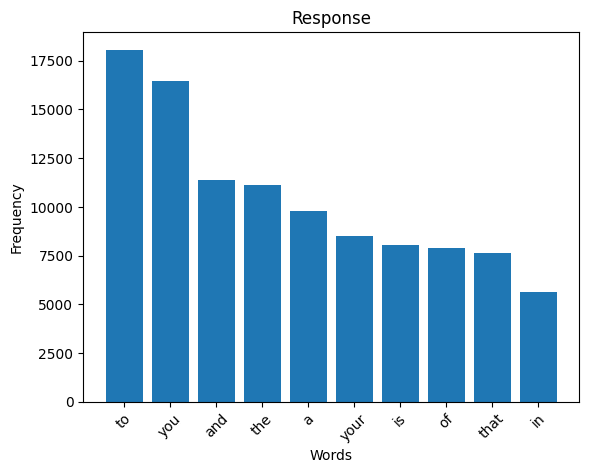

In [21]:
#@title Most common words

# Split the 'Context' documents into words and flatten the list
context_words = [word for document in df3["Context"] for word in str(document).split()]

# Count the occurrences of each word in 'Context'
context_word_counts = Counter(context_words)

# Get the most common words and their counts in 'Context'
most_common_context_words = context_word_counts.most_common(10)

# Unzip the words and their counts in 'Context'
context_words, context_counts = zip(*most_common_context_words)

# Create and display a bar chart for 'Context'
plt.bar(context_words, context_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Context")
plt.show()

# Split the 'Response' documents into words and flatten the list
response_words = [word for document in df3["Response"] for word in str(document).split()]

# Count the occurrences of each word in 'Response'
response_word_counts = Counter(response_words)

# Get the most common words and their counts in 'Response'
most_common_response_words = response_word_counts.most_common(10)

# Unzip the words and their counts in 'Response'
response_words, response_counts = zip(*most_common_response_words)

# Create and display a bar chart for 'Response'
plt.bar(response_words, response_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Response")
print(" ")
plt.show()

-------------------

# Data 4
https://huggingface.co/datasets/alexandreteles/mental-health-conversational-data

## Explore data

In [ ]:
dataset = load_dataset("alexandreteles/mental-health-conversational-data")

In [ ]:
#@title Convert to Pandas df

train_dataset = dataset["train"]
df4 = train_dataset.to_pandas()

df4.head()

In [ ]:
df4.shape

In [ ]:
df4.info()

In [ ]:
df3.isnull().sum()

In [ ]:
#@title Drop columns

# Select only the 'questionText' and 'answerText' columns
df4 = df4[['Context', 'Response']]
df4.head()

## Clean data

In [ ]:
#@title Remove the duplicate rows
df4.drop_duplicates()
df4.shape

In [ ]:
#@title Normalize Text
# & Remove Unicode Characters

def clean_text(text):
  text = str(text).lower() # Convert text to lowercase
  text = re.sub("[\[].*?[\]]", "", text) # Remove text within square brackets
  text = re.sub(r"http\S+", "", text) # Remove URLs
  text = re.sub(r"[^\w\s]", "", text) # Remove non-alphanumeric characters (excluding spaces)
  text = re.sub(r"\d+", "", text) # Remove digits
  return text

# Apply the clean_text function
df4['Context'].apply(clean_text)
df4['Response'].apply(clean_text)
df4.head()

In [ ]:
#@title Remove escape sequences

df4['Context'] = df4['Context'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
df4['Response'] = df4['Response'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

df4.head()

## Add token

In [ ]:
df4['Context'] = df4['Context'].apply(lambda x: "<user> " + str(x))
df4['Response'] = df4['Response'].apply(lambda x: "<agent> " + str(x))

df4.head()

In [ ]:
df4['Context'][0]

In [ ]:
df4['Response'][0]

## Visualizations

In [ ]:
#@title Cloud image

# Join the array of strings into a single string
Context = " ".join(df4["Context"])
Response = " ".join(df4["Response"])

# Generate and display a word cloud image (Context)
wordcloud = WordCloud(background_color='white').generate(Context)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Context")
plt.show()

# Generate and display a word cloud image (Response)
wordcloud = WordCloud(background_color='white').generate(Response)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Response")
print(" ")
plt.show()

In [ ]:
#@title Most common words

# Split the 'Context' documents into words and flatten the list
context_words = [word for document in df4["Context"] for word in str(document).split()]

# Count the occurrences of each word in 'Context'
context_word_counts = Counter(context_words)

# Get the most common words and their counts in 'Context'
most_common_context_words = context_word_counts.most_common(10)

# Unzip the words and their counts in 'Context'
context_words, context_counts = zip(*most_common_context_words)

# Create and display a bar chart for 'Context'
plt.bar(context_words, context_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Context")
plt.show()

# Split the 'Response' documents into words and flatten the list
response_words = [word for document in df4["Response"] for word in str(document).split()]

# Count the occurrences of each word in 'Response'
response_word_counts = Counter(response_words)

# Get the most common words and their counts in 'Response'
most_common_response_words = response_word_counts.most_common(10)

# Unzip the words and their counts in 'Response'
response_words, response_counts = zip(*most_common_response_words)

# Create and display a bar chart for 'Response'
plt.bar(response_words, response_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title("Response")
print(" ")
plt.show()

-------------------

# Download data

In [ ]:
from google.colab import files

In [ ]:
#@title Data1

df.to_csv('health_data_1.csv', index=False) # Save the DataFrame to a CSV file
files.download('health_data_1.csv')

In [ ]:
#@title Data2

df2.to_csv('health_data_2.csv', index=False) # Save the DataFrame to a CSV file
files.download('health_data_2.csv')

In [ ]:
#@title Data3

df3.to_csv('health_data_3.csv', index=False) # Save the DataFrame to a CSV file
files.download('health_data_3.csv')

In [ ]:
#@title Data4

df4.to_csv('health_data_4.csv', index=False) # Save the DataFrame to a CSV file
files.download('health_data_4.csv')